In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Alignments 
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style
print(f"Matplotlib Version : {mpl.__version__}")
%matplotlib inline

import seaborn as sns # theme & dataset
print(f"Seaborn Version : {sns.__version__}")


Matplotlib Version : 3.7.1
Seaborn Version : 0.11.2


In [3]:
all_df=pd.read_csv('migros_all_data.csv')

In [4]:
all_df['monthly_rev'] = all_df['population']*0.6*500
all_df['cur_market_share_m'] = all_df['store_count_migros']/(all_df['store_count_migros']+all_df['store_count_coop'])
all_df['cur_montly_rev_m'] = all_df['monthly_rev']*all_df['cur_market_share_m']
all_df['new_market_share_m'] = (all_df['store_count_migros']+1)/(all_df['store_count_migros']+all_df['store_count_coop']+1)
all_df['new_montly_rev_m'] = all_df['monthly_rev']*all_df['new_market_share_m']
all_df['additional_monthly_rev'] = all_df['new_montly_rev_m'] - all_df['cur_montly_rev_m']


In [5]:
all_df['additional_monthly_rev'] = all_df['additional_monthly_rev'].astype(int)
all_df['zipcode'] = all_df['zipcode'].astype(str)
all_df

,Unnamed: 0,zipcode,population,store_count_migros,store_count_coop,monthly_rev,cur_market_share_m,cur_montly_rev_m,new_market_share_m,new_montly_rev_m,additional_monthly_rev
0,1,8001,5468,3,5,1640400.0,0.375000,6.151500e+05,0.444444,7.290667e+05,113916
1,2,8002,9696,2,2,2908800.0,0.500000,1.454400e+06,0.600000,1.745280e+06,290880
2,3,8003,20210,1,2,6063000.0,0.333333,2.021000e+06,0.500000,3.031500e+06,1010500
3,4,8004,26855,3,3,8056500.0,0.500000,4.028250e+06,0.571429,4.603714e+06,575464
4,5,8005,15555,4,6,4666500.0,0.400000,1.866600e+06,0.454545,2.121136e+06,254536
5,6,8006,18284,1,2,5485200.0,0.333333,1.828400e+06,0.500000,2.742600e+06,914200
6,7,8008,17254,4,4,5176200.0,0.500000,2.588100e+06,0.555556,2.875667e+06,287566
7,8,8032,17921,0,1,5376300.0,0.000000,0.000000e+00,0.500000,2.688150e+06,2688150
8,9,8037,16008,2,2,4802400.0,0.500000,2.401200e+06,0.600000,2.881440e+06,480240
9,10,8038,17634,2,2,5290200.0,0.500000,2.645100e+06,0.600000,3.174120e+06,529020


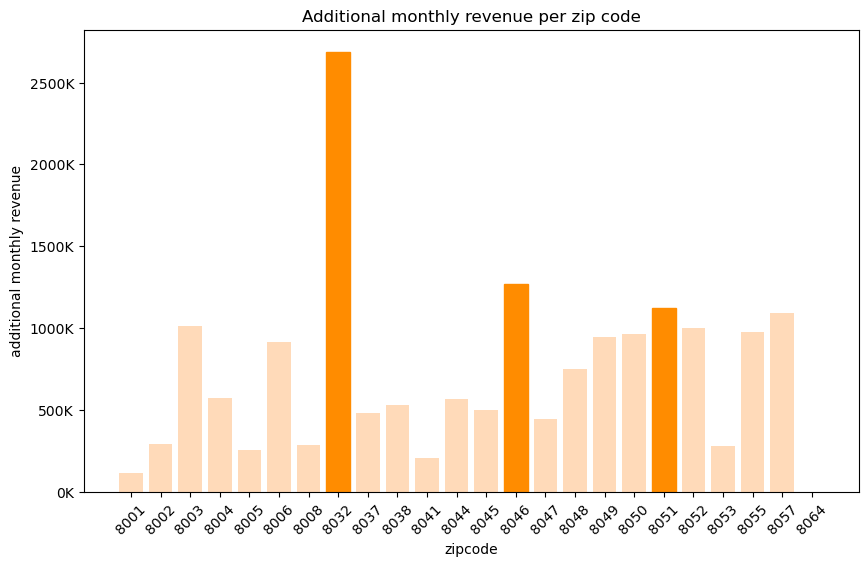

In [13]:
import matplotlib.ticker as ticker
plt.figure(figsize=(10,6))
bars = plt.bar('zipcode','additional_monthly_rev',data=all_df,color=['#FFDAB9'])
plt.xticks(rotation=45)
plt.xlabel('zipcode')
plt.ylabel('additional monthly revenue')
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x * 1e-3))
plt.gca().yaxis.set_major_formatter(formatter)
#plt.ticklabel_format(style='plain',axis='y')
plt.title('Additional monthly revenue per zip code')
top_zips_index = np.argsort(all_df['additional_monthly_rev'])[-3:]
for final_candidate in top_zips_index:
    bars[final_candidate].set_color('#FF8C00')
plt.savefig('additional_rev.svg')
plt.show()

<Figure size 640x480 with 0 Axes>